In [ ]:
import create_r3d_functions as c3d

basecell = 2
c3d.create_grid(basecell,8,[
        basecell,basecell*3/4,basecell*2/4,basecell*1/4
    ]
)



In [2]:
from bhmie.makedustopac import *

compute_opac_mie()



In [2]:
import analyze_r3d_functions as a3d
import numpy as np

wavelengths,nwave = a3d.load_wavelengthgrid()

print(
    np.array([
        wavelength*1e-4 for wavelength in wavelengths
    ])
)

[1.00000000e-05 1.10520985e-05 1.22148882e-05 1.35000147e-05
 1.49203493e-05 1.64901170e-05 1.82250398e-05 2.01424935e-05
 2.22616822e-05 2.46038305e-05 2.71923959e-05 3.00533038e-05
 3.32152074e-05 3.67097745e-05 4.05720044e-05 4.48405790e-05
 4.95582496e-05 5.47722657e-05 6.05348477e-05 6.69037100e-05
 7.39426394e-05 8.17221335e-05 9.03201070e-05 9.98226721e-05
 1.10325001e-04 1.21932277e-04 1.34760754e-04 1.48938913e-04
 1.64608754e-04 1.81927217e-04 2.01067752e-04 2.22222061e-04
 2.45602011e-04 2.71441762e-04 3.00000109e-04 3.31563076e-04
 3.66446778e-04 4.05000589e-04 4.47610641e-04 4.94703690e-04
 5.46751392e-04 6.04275025e-04 6.67850710e-04 7.38115184e-04
 8.15772173e-04 9.01599442e-04 9.96456586e-04 1.10129364e-03
 1.21716057e-03 1.34521786e-03 1.48674803e-03 1.64316857e-03
 1.81604609e-03 2.00711203e-03 2.21827999e-03 2.45166490e-03
 2.70960420e-03 2.99468125e-03 3.30975122e-03 3.65796965e-03
 4.04282410e-03 4.46816902e-03 4.93826442e-03 5.45781849e-03
 6.03203476e-03 6.666664

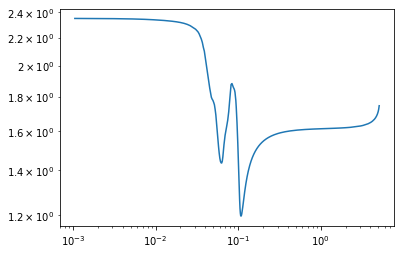

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mg2sio4 = np.loadtxt('../bhmie/lnk/mg2sio4.lnk',delimiter=' ')

plt.plot(1/mg2sio4[:,0],mg2sio4[:,1])
plt.xscale('log')
plt.yscale('log')





In [1]:
import opacity_r3d_functions as o3d


o3d.create_kappaabs(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,0.13,0.17,0.22,0.28,0.36,0.46,0.60,0.77,1.00]
)

För proof of concept-koden:

Använd dessa agrainum:

Avrunda till 2 decimaler

agrain      range

0.10   0.074 - 0.135

0.13   0.096 - 0.175

0.17   0.129 - 0.229

0.22   0.163 - 0.297

0.28   0.207 - 0.378

0.36   0.267 - 0.486

0.46   0.341 - 0.621

0.60   0.444 - 0.810

0.77   0.570 - 1.039

1.00   0.741 - 1.350

In [1]:
import analyze_r3d_functions as a3d
import create_r3d_functions as c3d


c3d.create_spheredensity(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,1.00]    
)


Writing dust_density.inp
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.34480268109295337 0.1 0
0.3696845502136472 0.1 0
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.33166247903553997 0.1 0
0.30368111930480995 0.1 0
0.2886751345948129 0.1 0
0.2886751345948129 0.1 0
0.30368111930480995 0.1 0
0.33166247903553997 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.30368111930480995 0.1 0
0.2728450923957484 0.1 0
0.2560381915956203 0.1 0
0.2560381915956203 0.1 0
0.2728450923957484 0.1 0
0.30368111930480995 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886751345948129 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886

# co5bold data - anteckningar

- i teststjärnan,


    ['Z'][0][0]

    [7], 10 tid i sekunder

    [13] - time step number

    [16], [19], [22] - cellcentrumkoordinater i cm

    [25],28,31     - cellboundary coords i cm

     34 - densitet i g/cm3! 317**3 antal celler!

     37 - internal energy erg/g - gör om till temperaturer? E=nkT? Knappast ideellt men en början

- teststar['EOS'][0][0][0] - är 317**3 (innehåller 2 arrayer-arrayer)

    Nästa steg [0] har 317**2

    Nästa har 317. Så det är nåt värde per cell

    Alla är i stolreken 1e-4

> Kolla manualen efter EOS
    
- teststar['OPA']... - opaciteter, kappa skrivs i infon - vll jag ha - hitta unique här och se om du kan minska ner till ett tiotal kappa

- ['PAR'] - har info om själva beräkningstid etc, inställningar



In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
teststar = teststar['ful']

# Dict-columns
print(teststar.dtype.names)

#print(teststar['ful']['PAR'][0])
# Info on model run, stellar initial properties

#print(teststar['Z'])

# Probably grid sizes
#print(teststar['Z'][0][0][4])

# Total time(?)
#print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")

# Coordinates of one grid direction
#print(teststar['Z'][0][0][16][0][0]) #  -5.4185920e+13 - 5.4185844e+13  b'cm', b'x1 coordinates of cell

# XYZ-cell center coordinates in centimeters
print(np.size(teststar['Z'][0][0][16]))
print(np.size(teststar['Z'][0][0][19]))
print(np.size(teststar['Z'][0][0][22]))
print(np.size(teststar['Z'][0][0][25]))


ngrid = np.size(teststar['Z'][0][0][16])

gridx = []
gridy = []
gridz = []

for nn in range(ngrid):
    gridx.append(teststar['Z'][0][0][16][0][0][nn]/AUcm)
    gridy.append(teststar['Z'][0][0][19][0][nn][0]/AUcm)
    gridz.append(teststar['Z'][0][0][22][nn][0][0]/AUcm)

gridcournx = []
gridcourny = []
gridcournz = []

for nn in range(ngrid+1):
    gridcournx.append(teststar['Z'][0][0][25][0][0][nn]/AUcm)
    gridcourny.append(teststar['Z'][0][0][28][0][nn][0]/AUcm)
    gridcournz.append(teststar['Z'][0][0][31][nn][0][0]/AUcm)


('TYPE', 'HEAD', 'DATASET_ID', 'DATASET_ID__UNIT', 'DATASET_ID__NAME', 'MODELTIME', 'MODELTIME__UNIT', 'MODELTIME__NAME', 'MODELTIME_DB', 'MODELTIME_DB__UNIT', 'MODELTIME_DB__NAME', 'MODELITIME', 'MODELITIME__UNIT', 'MODELITIME__NAME', 'DTIME', 'DTIME__UNIT', 'DTIME__NAME', 'TIME_OUT_FULL_LAST', 'TIME_OUT_FULL_LAST__UNIT', 'TIME_OUT_FULL_LAST__NAME', 'TIME_OUT_MEAN_LAST', 'TIME_OUT_MEAN_LAST__UNIT', 'TIME_OUT_MEAN_LAST__NAME', 'Z', 'EOS', 'OPA', 'PAR')
317
317
317
318


In [54]:
teststar['Z'][0][0][22][2][0][0]

-53500017000000.0

Max difference between cell sizes: 5.607433254464778e-07
Mean cellsize: 0.022924646491984432


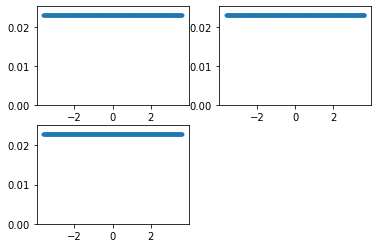

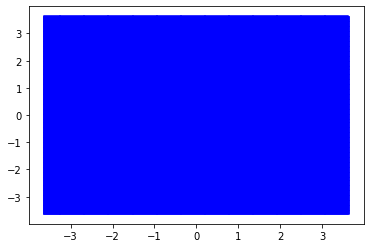

In [84]:

ngrid = np.size(gridx)

# Cell sizes
#teststar['Z'][0][0][25]))
#teststar['Z'][0][0][28]))
#teststar['Z'][0][0][31]))

#import create_r3d_functions as a3d


#> översätta grids: Jag har R,x,y,z-koordinater för alla celler för mina grids.
#    från co5bold har jag hörnen och avstånd från mitten av vardera axel
#    0. gör ett grid som har motsvarande upplösning och storlek som co5bold
#    1. gör en likadan lista med R,x,y,z-koordinater för alla celler
#    2. leta upp vilka co5boldceller motsvarar mina celler
#    3. spara rätt densiteter, temperaturer, absorptioner i min lista


nx,ny,nz = 0,0,0
cellsizesx = []
cellsizesy = []
cellsizesz = []

for nn in range(ngrid):

    cellsizesx.append(
        (teststar['Z'][0][0][25][0][0][nn+1] - teststar['Z'][0][0][25][0][0][nn])/AUcm
    )
    cellsizesy.append(
        (teststar['Z'][0][0][28][0][nn+1] - teststar['Z'][0][0][28][0][nn])[0]/AUcm
    )
    cellsizesz.append(
        (teststar['Z'][0][0][31][nn+1] - teststar['Z'][0][0][31][nn])[0][0]/AUcm
    )


plt.figure('gridsize')
plt.subplot(2,2,1)
plt.plot(gridx,cellsizesx,'.')
plt.ylim(0,np.max(cellsizesx)*(1.1))

plt.subplot(2,2,2)
plt.plot(gridy,cellsizesy,'.')
plt.ylim(0,np.max(cellsizesy)*(1.1))

plt.subplot(2,2,3)
plt.plot(gridz,cellsizesz,'.')
plt.ylim(0,np.max(cellsizesz)*(1.1))


print(f'Max difference between cell sizes: {np.max(np.diff(cellsizesx))}')
print(f'Mean cellsize: {np.mean(cellsizesx)}')

plt.figure('grid')
for nn in range(ngrid):
    plt.plot([gridcournx[nn],gridcournx[nn]],[gridcourny[0],gridcourny[-1]],'b')
    plt.plot([gridcournx[0],gridcournx[-1]],[gridcourny[nn],gridcourny[nn]],'b')



#print(np.size(teststar['EOS'][0][0][0][0][0]))


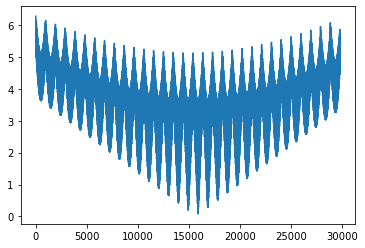

In [20]:
import matplotlib.pyplot as plt

AUcm = 1.49598e13 # cm

radialgrid = []

for nx in range(int(ngrid/10)):
    for ny in range(int(ngrid/10)):
        for nz in range(int(ngrid/10)):
            radialgrid.append(np.sqrt(gridx[10*nx]**2 + gridy[10*ny]**2 + gridz[10*nz]**2)/AUcm)


plt.plot(radialgrid)

"""    
plt.figure('x-y')
plt.plot(gridx[nn]/AUcm,gridy[nn]/AUcm,'b.')
plt.figure('x-z')
plt.plot(gridx[nn]/AUcm,gridz[nn]/AUcm,'r.')
""";



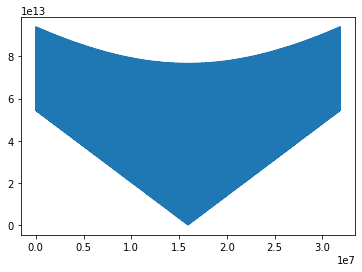

In [120]:
# What's next?

#  Densities: teststar['Z'][0][0][34][nx][ny][nz]

import create_r3d_functions as c3d

cobolddensities = np.zeros(ngrid**3)
cobolddistances = np.zeros((ngrid**3,4))
nx,ny,nz = 0,0,0



#for nn in range(ngrid):
#    gridx.append(teststar['Z'][0][0][16][0][0][nn]/AUcm)
#    gridy.append(teststar['Z'][0][0][19][0][nn][0]/AUcm)
#    gridz.append(teststar['Z'][0][0][22][nn][0][0]/AUcm)


for nn in range(ngrid**3):
    # Save densities
    cobolddensities[nn] = teststar['Z'][0][0][34][nx][ny][nz]

    # Save radial,x,y,z distances in cm
    cobolddistances[nn,1] = teststar['Z'][0][0][16][0][0][nx]
    cobolddistances[nn,2] = teststar['Z'][0][0][19][0][ny][0]
    cobolddistances[nn,3] = teststar['Z'][0][0][22][nz][0][0]
    
    cobolddistances[nn,0] = np.sqrt(
        cobolddistances[nn,1]**2 + cobolddistances[nn,2]**2 + cobolddistances[nn,3]**2
    )

    # Save cellsizes


    # Move coordinates
    nx,ny,nz = c3d.movecoordinates(ngrid,nx,ny,nz)



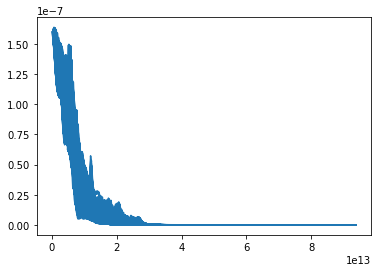

In [127]:
plt.figure('co5bold densities')
plt.plot(cobolddistances[:,0]/AUcm,cobolddensities)


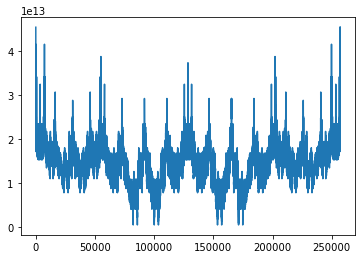

In [125]:
# Load my r3d-grid
import analyze_r3d_functions as a3d

griddistances = a3d.load_griddistances()

plt.plot(griddistances[:,0])


# Loop through grids and extract cobolddensities to my grid

# how?


